In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!cd yolov5 & pip install -r requirements.txt

     -------------------------------------- 909.5/909.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 12.2/12.2 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [17 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ASUS\AppData\Local\Temp\pip-install-2aa40vj6\nvidia-tensorrt_d7447f038c824ca191e730d2c8c2d993\setup.py", line 150, in <module>
      raise RuntimeError(open("ERROR.txt", "r").read())
  RuntimeError:
  ###########################################################################################
  The package you are trying to install is only a placeholder project on PyPI.org repository.
  This package is hosted on NVIDIA Python Package Index.
  
  This package can be installed as:
  ```
  $ pip install nvidia-pyindex
  $ pip install nvidia-tensorrt
  ```
  ###########################################################################################
  
  [end of output]
  
  note: This error originates from 

In [5]:
!pip uninstall opencv-python-headless -y 

In [6]:
!pip install opencv-python --upgrade


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## DETECTION

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load(r'yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', source='local')

requirements: YOLOv5 requirements "gitpython>=3.1.30" "coremltools>=6.0" "onnx>=1.12.0" "onnx-simplifier>=0.4.1" "nvidia-pyindex" "nvidia-tensorrt" "scikit-learn<=1.1.2" "tensorflow>=2.4.1" "tensorflowjs>=3.9.0" "openvino-dev" "setuptools>=65.5.1" not found, attempting AutoUpdate...
requirements:  Command 'pip install "gitpython>=3.1.30" "coremltools>=6.0" "onnx>=1.12.0" "onnx-simplifier>=0.4.1" "nvidia-pyindex" "nvidia-tensorrt" "scikit-learn<=1.1.2" "tensorflow>=2.4.1" "tensorflowjs>=3.9.0" "openvino-dev" "setuptools>=65.5.1"  ' returned non-zero exit status 1.
YOLOv5  2023-4-3 Python-3.10.4 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

image 1/1: 1600x1200 1 POCARI
Speed: 32.0ms pre-process, 232.0ms inference, 0.0ms NMS per image at shape (1, 3, 640, 480)


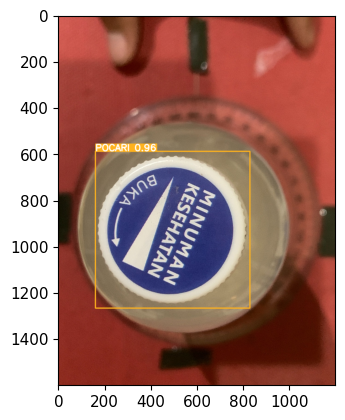

[array([[[217,  96,  85],
         [217,  96,  85],
         [217,  96,  85],
         ...,
         [201,  79,  66],
         [209,  87,  74],
         [216,  94,  81]],
 
        [[220,  99,  88],
         [222, 101,  90],
         [220,  99,  88],
         ...,
         [204,  82,  69],
         [206,  84,  71],
         [208,  86,  73]],
 
        [[220,  99,  88],
         [224, 103,  92],
         [221, 100,  91],
         ...,
         [204,  82,  69],
         [206,  84,  71],
         [208,  86,  73]],
 
        ...,
 
        [[145,  47,  34],
         [142,  44,  31],
         [143,  45,  32],
         ...,
         [154,  65,  49],
         [158,  69,  53],
         [159,  70,  54]],
 
        [[145,  47,  34],
         [145,  47,  34],
         [146,  48,  35],
         ...,
         [150,  61,  45],
         [153,  64,  46],
         [157,  68,  50]],
 
        [[144,  46,  33],
         [147,  49,  36],
         [148,  50,  37],
         ...,
         [152,  63,  47],
  

In [7]:
img = 'coba.jpg'
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
results.render()

image 1/1: 640x640 1 COLA R
Speed: 16.0ms pre-process, 303.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


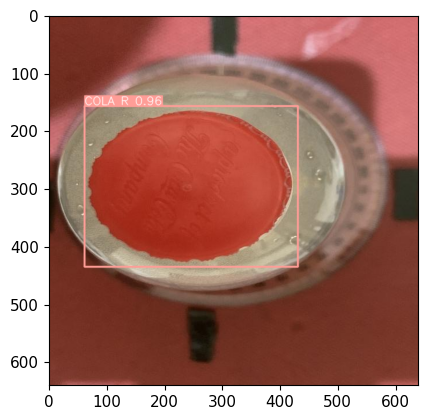

[array([[[120,  48,  36],
         [120,  48,  36],
         [121,  49,  37],
         ...,
         [209, 109, 111],
         [207, 107, 109],
         [206, 106, 108]],
 
        [[120,  48,  36],
         [121,  49,  37],
         [122,  50,  38],
         ...,
         [210, 110, 112],
         [209, 109, 111],
         [208, 108, 110]],
 
        [[121,  49,  37],
         [122,  50,  38],
         [122,  50,  38],
         ...,
         [211, 111, 113],
         [211, 111, 113],
         [211, 111, 113]],
 
        ...,
 
        [[126,  58,  47],
         [126,  58,  47],
         [126,  58,  47],
         ...,
         [178,  93,  86],
         [177,  92,  85],
         [177,  92,  85]],
 
        [[126,  58,  47],
         [125,  57,  46],
         [125,  57,  46],
         ...,
         [184,  97,  90],
         [181,  94,  87],
         [179,  92,  85]],
 
        [[126,  58,  47],
         [125,  57,  46],
         [124,  56,  45],
         ...,
         [195, 108, 101],
  

In [8]:
img = 'coba2.jpg'
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
results.render()

image 1/1: 640x640 1 COLA B
Speed: 8.0ms pre-process, 288.0ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


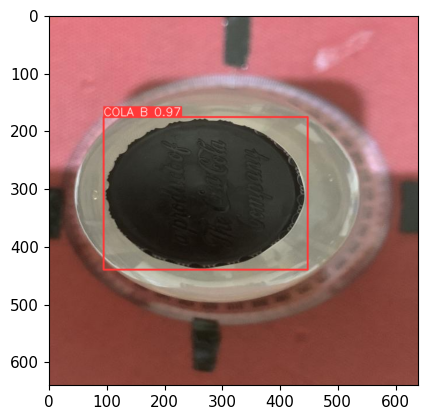

[array([[[232, 127, 132],
         [231, 126, 131],
         [230, 125, 130],
         ...,
         [225, 121, 132],
         [226, 122, 133],
         [227, 123, 134]],
 
        [[230, 125, 130],
         [229, 124, 129],
         [229, 124, 129],
         ...,
         [226, 122, 133],
         [228, 124, 135],
         [229, 125, 136]],
 
        [[227, 122, 127],
         [227, 122, 127],
         [228, 123, 128],
         ...,
         [227, 123, 134],
         [229, 125, 136],
         [230, 126, 137]],
 
        ...,
 
        [[143,  73,  65],
         [143,  73,  65],
         [143,  73,  65],
         ...,
         [145,  77,  68],
         [145,  77,  68],
         [145,  77,  68]],
 
        [[143,  73,  65],
         [143,  73,  65],
         [143,  73,  65],
         ...,
         [145,  77,  68],
         [144,  76,  67],
         [144,  76,  67]],
 
        [[143,  73,  65],
         [143,  73,  65],
         [143,  73,  65],
         ...,
         [144,  76,  67],
  

In [9]:
img = 'coba3.jpg'
results = model(img)
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
results.render()

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!python yolov5/detect.py --weights yolov5/runs/train/exp/weights/last.pt --source 0  

In [7]:
!python yolov5/export.py --weights yolov5/runs/train/exp/weights/best.pt --include tflite

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 640, 640, 3)]   0           []                               
                                                                                                  
 tf_conv (TFConv)               (1, 320, 320, 32)    3488        ['input_1[0][0]']                
                                                                                                  
 tf_conv_1 (TFConv)             (1, 160, 160, 64)    18496       ['tf_conv[0][0]']                
                                                                                                  
 tfc3 (TFC3)                    (1, 160, 160, 64)    18624       ['tf_conv_1[0][0]']              
                                                                                              

export: data=C:\Users\ASUS\Documents\kuliah\Untitled Folder\yolov5\data\coco128.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
fatal: cannot change to 'C:\Users\ASUS\Documents\kuliah\Untitled': No such file or directory
YOLOv5  2023-4-3 Python-3.11.0 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from yolov5\runs\train\exp\weights\best.pt with output shape (1, 25200, 9) (13.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Co